<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import metrics

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
X.shape

(506, 13)

In [4]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [5]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
X.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

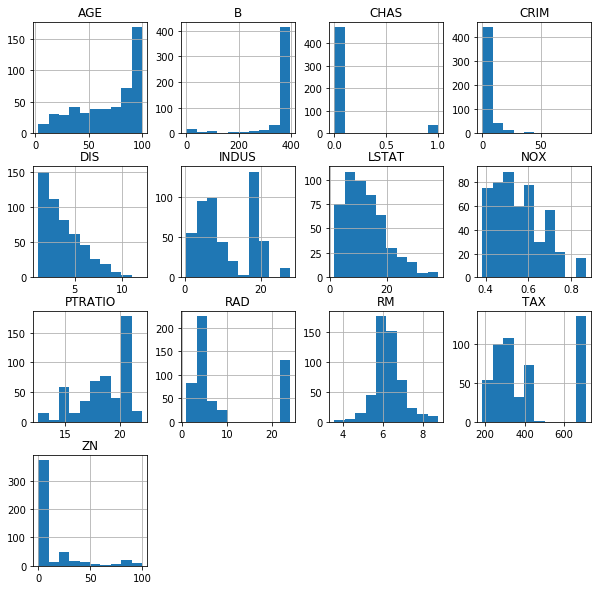

In [8]:
X.hist(figsize=(10,10),bins=10);

In [9]:
Xy = X.merge(y, right_index = True, left_index = True)

Based on the merge from X and y I created a scatterplot for each specific column from X against 'MEDV' as y

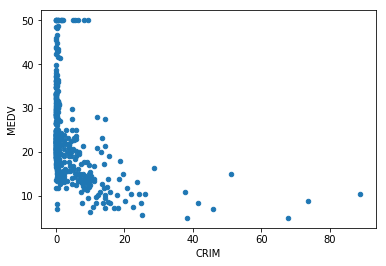

In [10]:
Xy.plot(kind = 'scatter', x = 'CRIM', y = 'MEDV')

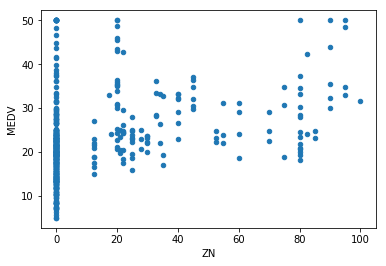

In [11]:
Xy.plot(kind = 'scatter', x = 'ZN', y = 'MEDV')

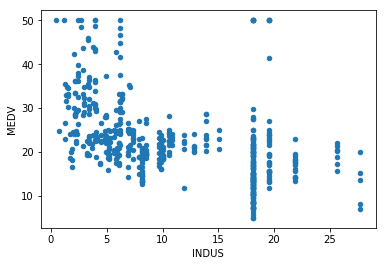

In [12]:
Xy.plot(kind = 'scatter', x = 'INDUS', y = 'MEDV')

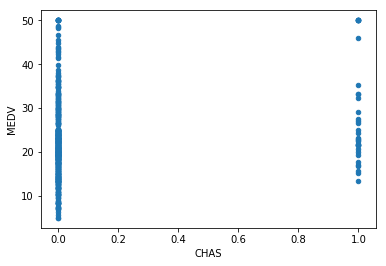

In [13]:
Xy.plot(kind = 'scatter', x = 'CHAS', y = 'MEDV')

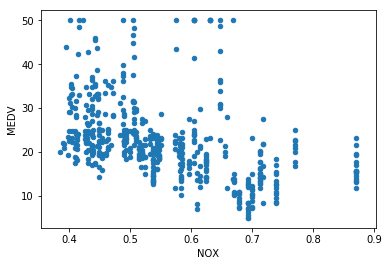

In [14]:
Xy.plot(kind = 'scatter', x = 'NOX', y = 'MEDV')

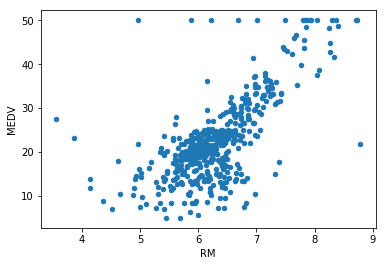

In [15]:
Xy.plot(kind = 'scatter', x = 'RM', y = 'MEDV')

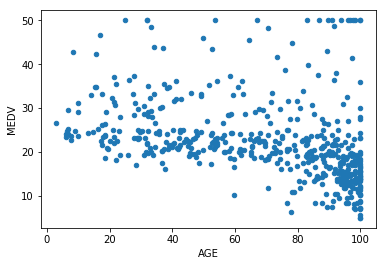

In [16]:
Xy.plot(kind = 'scatter', x = 'AGE', y = 'MEDV')

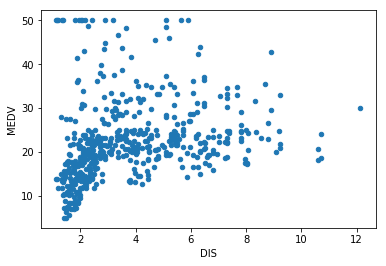

In [17]:
Xy.plot(kind = 'scatter', x = 'DIS', y = 'MEDV')

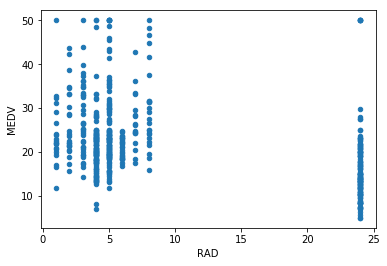

In [18]:
Xy.plot(kind = 'scatter', x = 'RAD', y = 'MEDV')

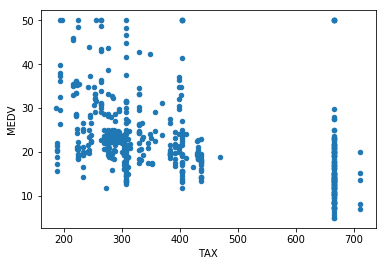

In [19]:
Xy.plot(kind = 'scatter', x = 'TAX', y = 'MEDV')

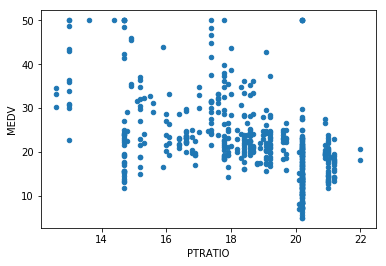

In [20]:
Xy.plot(kind = 'scatter', x = 'PTRATIO', y = 'MEDV')

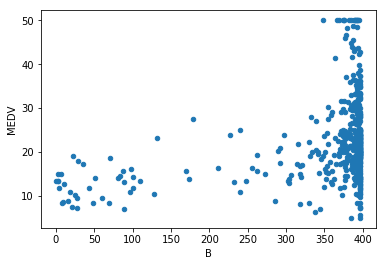

In [21]:
Xy.plot(kind = 'scatter', x = 'B', y = 'MEDV')

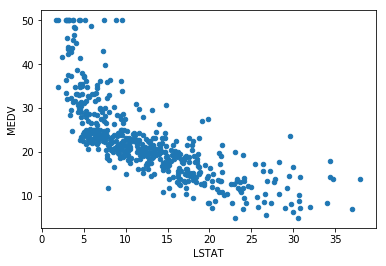

In [22]:
Xy.plot(kind = 'scatter', x = 'LSTAT', y = 'MEDV')

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [23]:
null_model = np.zeros(len(y)) + np.mean(y['MEDV'])

In [24]:
null_model_mse = metrics.mean_squared_error(y, null_model)
null_model_mse

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Step 1

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 456)

Step 2

In [27]:
linreg = LinearRegression()

Step 3

In [28]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Step 4 Train

In [29]:
y_prediction_70 = linreg.predict(X_train)
mse_70 = metrics.mean_squared_error(y_train, y_prediction_70)
mse_70

20.845771822568903

Step 4 Test

In [30]:
y_prediction_30 = linreg.predict(X_test)
mse_30 = metrics.mean_squared_error(y_test, y_prediction_30)
mse_30

25.40735887887113

- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [31]:
from sklearn import model_selection

In [32]:
kf = (model_selection.KFold(n_splits = 10, shuffle = True, random_state = 7))
#K-Folds set to 10

In [33]:
mse_scores_train_values = []

In [34]:
for train_indices, test_indices in kf.split(X,y):
    
    lr = LinearRegression()
    
    X_train = X.iloc[train_indices,:]
    y_train = y.iloc[train_indices]
    lr.fit(X_train,y_train)
        
    X_test = X.iloc[test_indices,:] 
    y_test = y.iloc[test_indices]
    
    y_pred = lr.predict(X_train)
    
    mse = metrics.mean_squared_error(y_train, y_pred)
    mse_scores_train_values.append(mse)    

Mean Squared Error over training set

In [35]:
np.array(mse_scores_train_values).mean()

21.800901991277215

In [36]:
mse_scores_test_values = []

In [37]:
for train_indices, test_indices in kf.split(X,y):
    
    lr = LinearRegression()
    
    X_train = X.iloc[train_indices,:]
    y_train = y.iloc[train_indices]
    
    lr.fit(X_train,y_train)
        
    X_test = X.iloc[test_indices,:]
    y_test = y.iloc[test_indices]
    
    y_pred = lr.predict(X_test)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores_test_values.append(mse)

Mean Squared Error over test set

In [38]:
np.array(mse_scores_test_values).mean()

23.749744979782363

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

84.42 null MSE vs 21.80 training MSE. This tells me that the training model has a lower bias then the null one.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

21.80 training MSE vs 23.75 test MSE. I would consider this differnce in the mean squared errors to confirm there is some variance is the model.

- How much of a bias problem does your model appear to have? Why do you say that?

I would consider the bias to be minimal due to the small mean squared error differnce as I stated above

- How much of a variance problem does your model appear to have? Why do you say that?

In regards to varience, when further reviewing the MSE list values in the test model I found the varince between results to be quite large. So the mean mean squared errors are close, but I believe the varince to be a problem.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [39]:
feature_columns = ['CRIM', 'RM', 'DIS','B']

In [40]:
X_feature = Xy.loc[:,feature_columns]
y = Xy.loc[:,'MEDV']

In [41]:
from sklearn import model_selection

In [42]:
kf2 = (model_selection.KFold(n_splits = 10, shuffle = True, random_state = 7))

In [43]:
mse_scores_train_values_2 = []

In [44]:
for train_indices, test_indices in kf2.split(X,y):
    
    lr = LinearRegression()
    
    X_train = X.iloc[train_indices,:]
    y_train = y.iloc[train_indices]
    
    lr.fit(X_train,y_train)
        
    X_test = X.iloc[test_indices,:]
    y_test = y.iloc[test_indices]
    
    y_pred = lr.predict(X_test)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores_train_values_2.append(mse)

MSE using 4 columns

In [45]:
np.array(mse_scores_train_values).mean()

21.800901991277215

The model did get worse by 0.05, which at the end of the day isn't that bad considering I went from 13 to 4 columns.

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

Next time!

# KNN Practice

In [46]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [47]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [48]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [49]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

- Get the accuracy of a null model that simply predicts the most common species.

In [50]:
iris.shape

(150, 6)

In [51]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [52]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [53]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [54]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

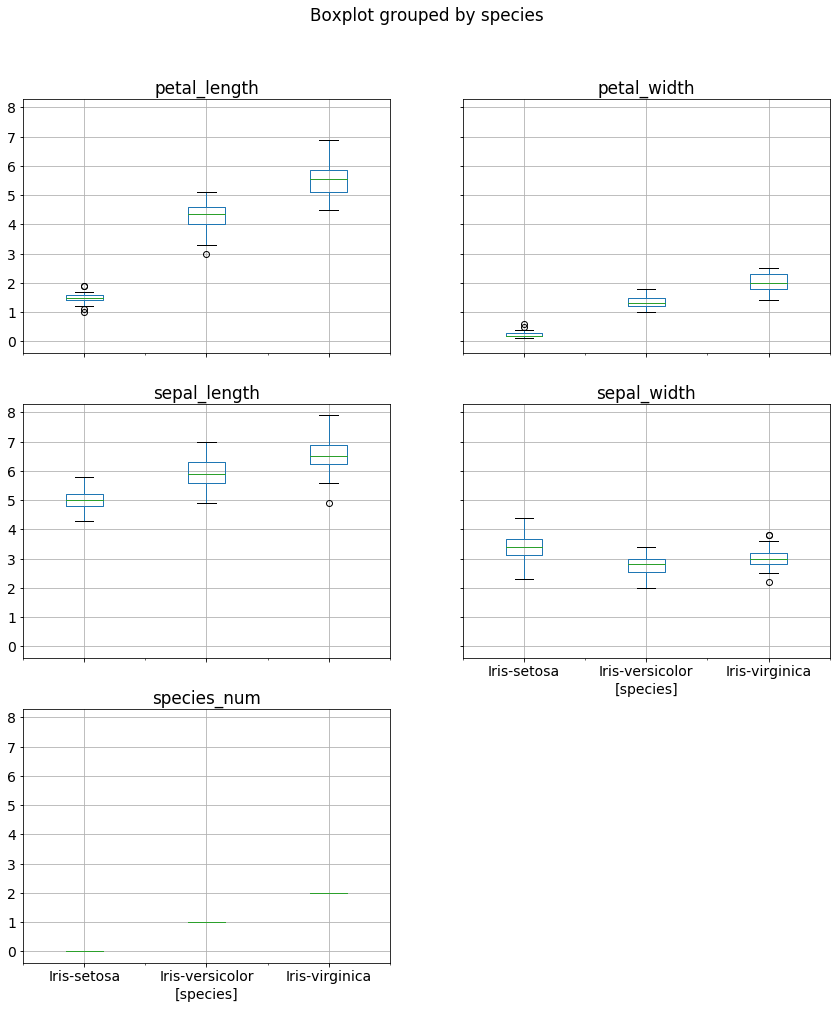

In [55]:
iris.boxplot(by = 'species',figsize = (14, 16));

In [56]:
y_iris = iris.loc[:, 'species_num']
y_iris.tail(10)

140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species_num, dtype: int64

In [57]:
frequency = y_iris.value_counts().sort_values(ascending = False)
total = frequency.sum()
total

150

In [58]:
biggest_frequency = frequency.iloc[0]
biggest_frequency / total

0.3333333333333333

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

In [60]:
X_iris = iris.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state = 99, shuffle = True)

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [63]:
y_iris_pred_class = knn.predict(X_iris_test)
y_iris_pred_train = knn.predict(X_iris_train)
print((metrics.accuracy_score(y_iris_test, y_iris_pred_class)))
print((metrics.accuracy_score(y_iris_train, y_iris_pred_train)))
print(metrics.mean_squared_error(y_iris_test,y_iris_pred_class))
print(metrics.mean_squared_error(y_iris_train,y_iris_pred_train))

0.9210526315789473
0.9821428571428571
0.07894736842105263
0.017857142857142856


In [64]:
kf = model_selection.KFold(n_splits = 10, shuffle = True)
list(kf.split(X_iris,y_iris))

[(array([  0,   1,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
          15,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
          29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
          83,  84,  85,  86,  87,  88,  90,  91,  92,  93,  95,  96,  98,
          99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 119, 120, 121, 123, 124, 125, 126,
         127, 128, 129, 130, 133, 134, 136, 137, 138, 139, 140, 142, 143,
         144, 145, 146, 147, 148]),
  array([  2,   8,  16,  35,  69,  89,  94,  97, 118, 122, 131, 132, 135,
         141, 149])),
 (array([  0,   1,   2,   3,   5,   6,   7,   8,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  22,  24, 

In [65]:
iris_mse_test_values = []
iris_mse_train_values = []
n = 0

In [66]:
for train_index, test_index in kf.split(X_iris, y_iris):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_iris.iloc[train_index,:], y_iris.iloc[train_index])
        
    iris_mse_test_values.append(metrics.mean_squared_error(y_iris.iloc[test_index], knn.predict(X_iris.iloc[test_index, :])))
    iris_mse_train_values.append(metrics.mean_squared_error(y_iris.iloc[train_index], knn.predict(X_iris.iloc[train_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE Train: {}'.format(iris_mse_train_values[n - 1]))
    print('MSE Test: {}'.format(iris_mse_test_values[n - 1]))

Model 1
MSE Train: 0.022222222222222223
MSE Test: 0.06666666666666667
Model 2
MSE Train: 0.02962962962962963
MSE Test: 0.13333333333333333
Model 3
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 4
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 5
MSE Train: 0.02962962962962963
MSE Test: 0.06666666666666667
Model 6
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 7
MSE Train: 0.02962962962962963
MSE Test: 0.13333333333333333
Model 8
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 9
MSE Train: 0.044444444444444446
MSE Test: 0.0
Model 10
MSE Train: 0.044444444444444446
MSE Test: 0.0


In [67]:
print('Train MSE for all folds: {}'.format(np.mean(iris_mse_train_values)))
print('Test MSE for all folds: {}'.format(np.mean(iris_mse_test_values)))

Train MSE for all folds: 0.03777777777777778
Test MSE for all folds: 0.04


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Training data returning 96% vs null data was 33%. Being that my scores were very accurate I would say that this model is NOT affected by bias. As for varaince, being that K fold results were fairly consistance I would consider variance to be low.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Results are as expected as accurary decreased from training to test, so would say it has a low bias

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Being that the acuuracy decrease and the K Fold scores are failry consistent I would believe that the model has movre of bias problem.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [68]:
kf = model_selection.KFold(n_splits = 10, shuffle = True)
list(kf.split(X_iris,y_iris))

iris_mse_test_values = []
iris_mse_train_values = []
n = 0

In [69]:
for train_index, test_index in kf.split(X_iris, y_iris):
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_iris.iloc[train_index,:], y_iris.iloc[train_index])
        
    iris_mse_test_values.append(metrics.mean_squared_error(y_iris.iloc[test_index], knn.predict(X_iris.iloc[test_index, :])))
    iris_mse_train_values.append(metrics.mean_squared_error(y_iris.iloc[train_index], knn.predict(X_iris.iloc[train_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE Train: {}'.format(iris_mse_train_values[n - 1]))
    print('MSE Test: {}'.format(iris_mse_test_values[n - 1]))

Model 1
MSE Train: 0.0
MSE Test: 0.0
Model 2
MSE Train: 0.0
MSE Test: 0.0
Model 3
MSE Train: 0.0
MSE Test: 0.06666666666666667
Model 4
MSE Train: 0.0
MSE Test: 0.0
Model 5
MSE Train: 0.0
MSE Test: 0.0
Model 6
MSE Train: 0.0
MSE Test: 0.0
Model 7
MSE Train: 0.0
MSE Test: 0.06666666666666667
Model 8
MSE Train: 0.0
MSE Test: 0.13333333333333333
Model 9
MSE Train: 0.0
MSE Test: 0.06666666666666667
Model 10
MSE Train: 0.0
MSE Test: 0.06666666666666667


In [70]:
print('Mean of Train MSE for all folds: {}'.format(np.mean(iris_mse_train_values)))
print('Mean of Test MSE for all folds: {}'.format(np.mean(iris_mse_test_values)))

Mean of Train MSE for all folds: 0.0
Mean of Test MSE for all folds: 0.039999999999999994


- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [71]:
scores = []

In [72]:
#for k in range(1, 100):
    #knn = KNeighborsClassifier(n_neighbors = k)
    #knn.fit(X_train, y_train)
    #pred = knn.predict(X_test)
    #scores.append([k, score])

#scores_df = pd.DataFrame(accuracy, columns=['k', 'accuracy'])
#model_plot = scores_df.plot(kind = 'line', x = 'k', y = 'accuracy')

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [73]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [74]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sat, 03 Nov 2018   Prob (F-statistic):          1.59e-321
Time:                        22:42:59   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

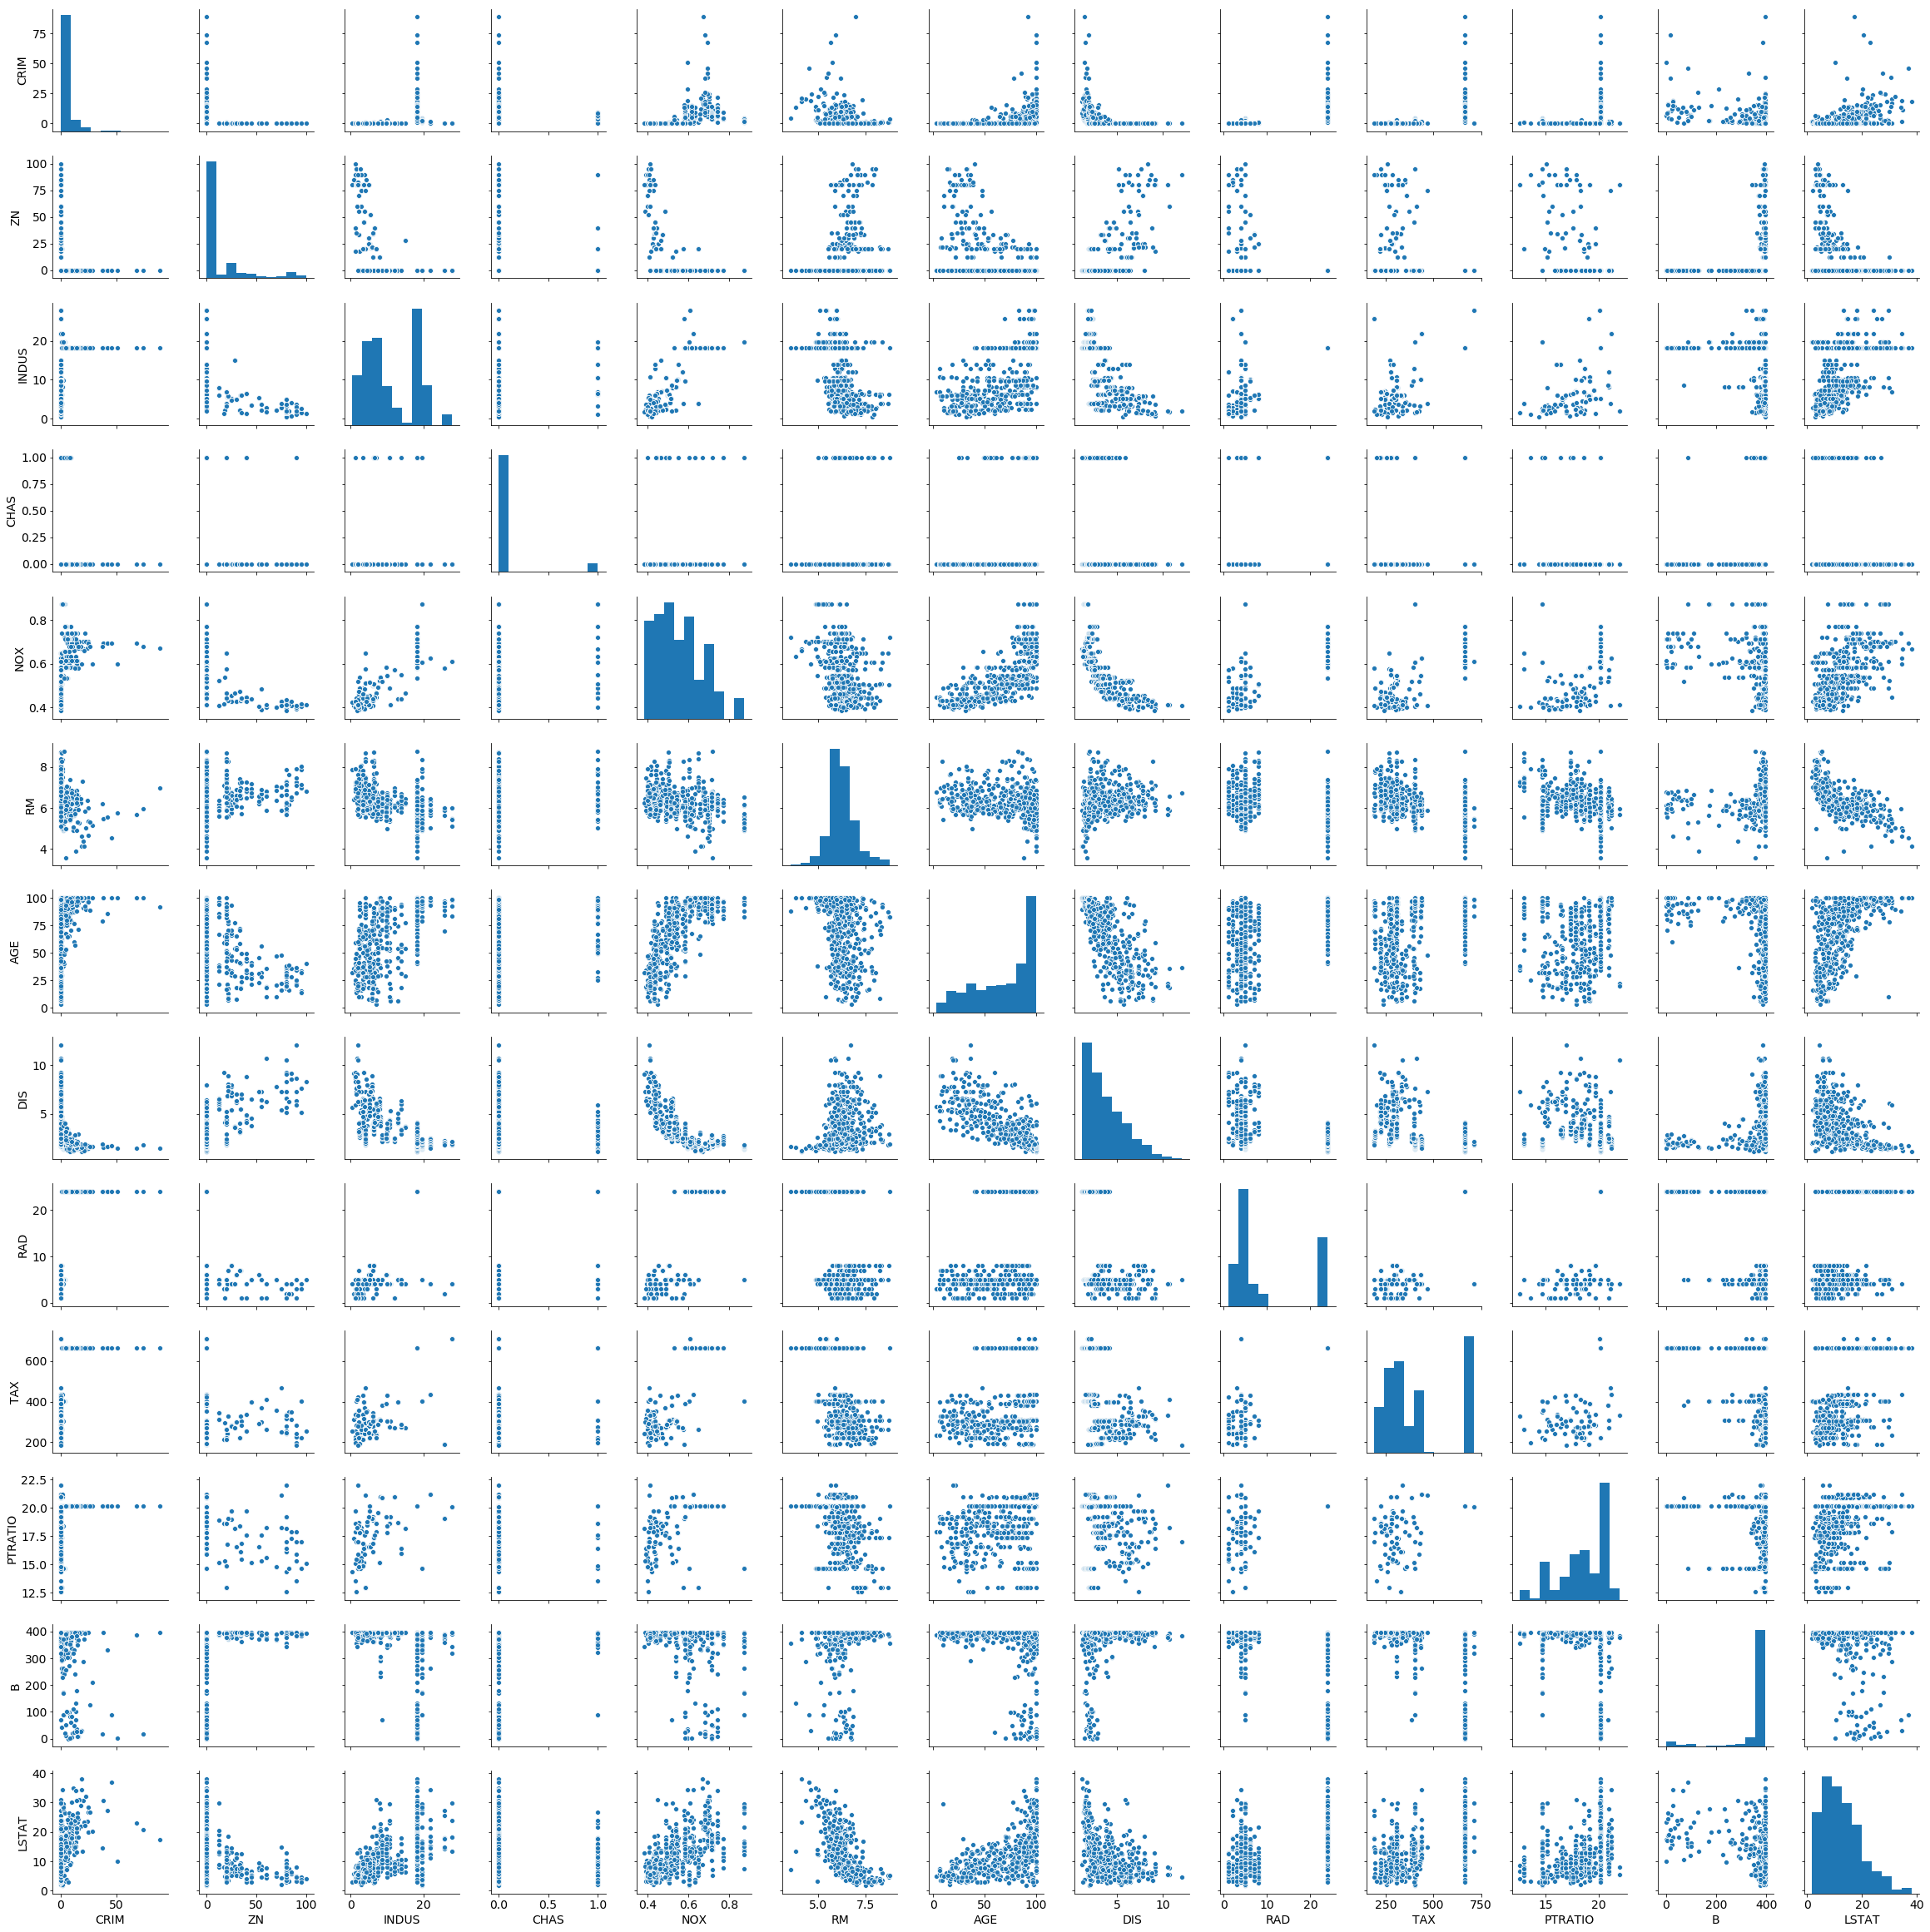

In [75]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [76]:
# Check out Pearson scores


### Demo: Patsy

In [77]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [78]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [79]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.49629155991322393
